In [107]:
import json
import networkx as nx
import itertools
import matplotlib
import matplotlib.pyplot as plt

In [5]:
test_data = json.load(open("soletta-2016-03-16_09-14-47.scm.json", "r"))
test_data.keys()

dict_keys(['type', 'name', 'meta', 'num_variables', 'num_concrete_features', 'labels', 'cnf_clauses', 'structure'])

In [6]:
test_conc, test_all, test_cnf = test_data["num_concrete_features"], test_data["num_variables"], test_data["cnf_clauses"]

In [21]:
test_conc, test_all

(364, 365)

In [7]:
nodes = list(range(1, test_all+1))

In [8]:
g = nx.Graph()
g.add_nodes_from(nodes)

In [11]:
for c in test_cnf:
    for v,w in itertools.combinations(c, 2):
        g.add_edge(abs(v),abs(w))

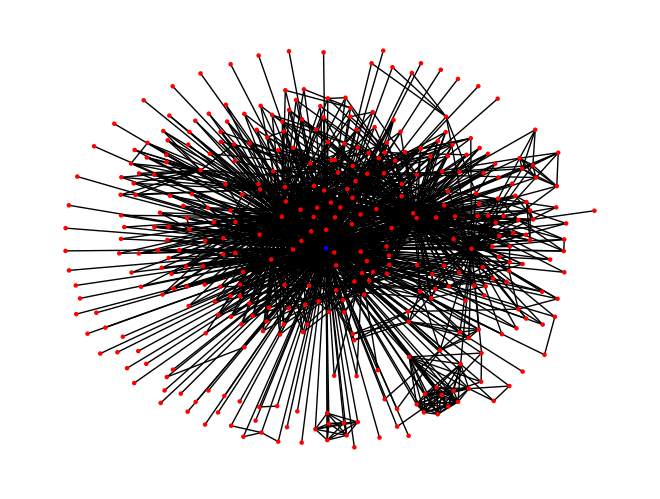

In [32]:
nx.draw(g, node_size=5, node_color=[('red' if n <= test_conc else 'blue') for n in range(1, test_all+1)])

In [64]:
def graph_k_core(graph, k):
    graph = graph.copy()
    removal_order = [v for v in graph.nodes if graph.degree(v) <= k]
    removal_order_pos = 0
    while removal_order_pos < len(removal_order):
        v = removal_order[removal_order_pos]
        removal_order_pos += 1
        for w in graph.neighbors(v):
            if graph.degree(w) == k + 1:
                removal_order.append(w)
        graph.remove_node(v)
    return graph, removal_order

def twostep_layout(graph, low_degree=3):
    high_degree_graph, removal_order = graph_k_core(graph, k=low_degree)
    max_degree = max(high_degree_graph.nodes, key=high_degree_graph.degree)
    high_degree_graph.remove_node(max_degree)
    nx.draw(high_degree_graph, node_size=5, pos=nx.nx_pydot.graphviz_layout(g))

In [105]:
def draw_instance(json_data, skip_largest_degree=True, remove_isolated=True, ax=None):
    n_concrete = json_data["num_concrete_features"]
    n_all = json_data["num_variables"]
    cnf = json_data["cnf_clauses"]
    nodes = list(range(1, n_all+1))
    g = nx.Graph()
    g.add_nodes_from(nodes)
    for c in cnf:
        for v,w in itertools.combinations(c, 2):
            xv, xw = abs(v), abs(w)
            if xv != xw:
                g.add_edge(xv,xw)
    if skip_largest_degree:
        max_degree = max(g.nodes, key=g.degree)
        g.remove_node(max_degree)
    if remove_isolated:
        isolated = [v for v in g.nodes if g.degree(v) == 0]
        g.remove_nodes_from(isolated)
    nx.draw(g, node_size=5, width=0.2, pos=nx.nx_pydot.graphviz_layout(g),
            ax=ax,
            node_color=[("red" if v <= n_concrete else "blue") for v in g.nodes])
    
def visualize_instance(output_file, json_data, skip_largest_degree=True, remove_isolated=True):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10,10)
    draw_instance(json_data, skip_largest_degree=skip_largest_degree, remove_isolated=remove_isolated, ax=ax)
    fig.savefig(output_file, bbox_inches='tight')
    return fig

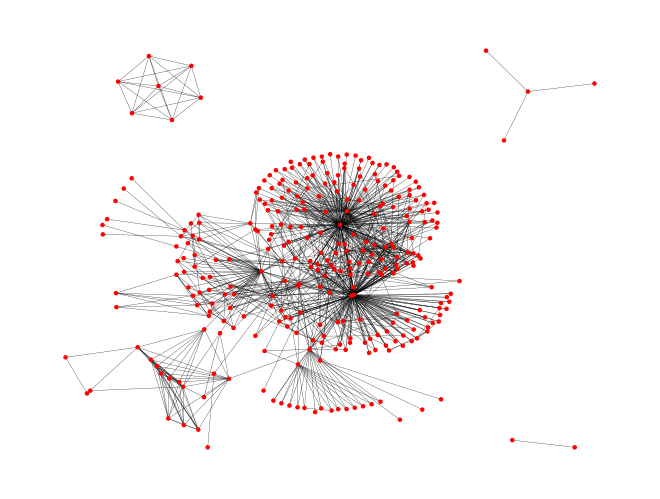

In [87]:
instance1 = json.load(open("soletta-2016-03-16_09-14-47.scm.json", "r"))
draw_instance(instance1)

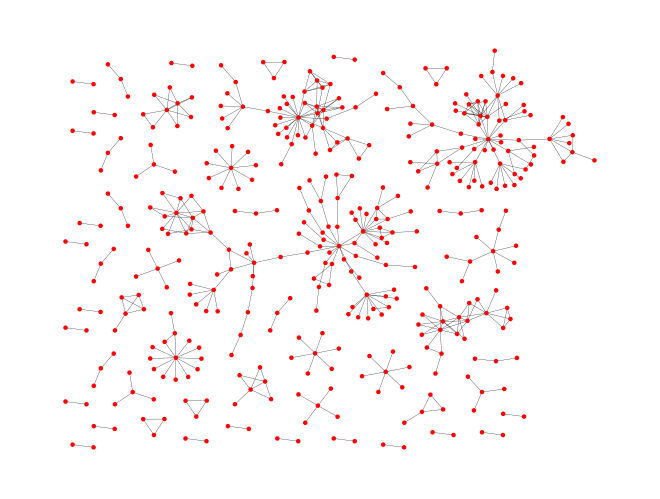

In [88]:
instance2 = json.load(open("busybox-2007-01-24_09-14-09.scm.json", "r"))
draw_instance(instance2)

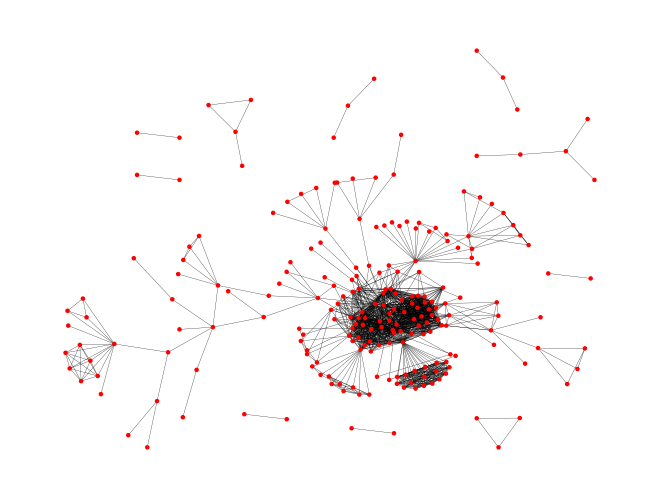

In [89]:
instance3 = json.load(open("uclibc-2008-09-25_12-51-24.scm.json", "r"))
draw_instance(instance3)

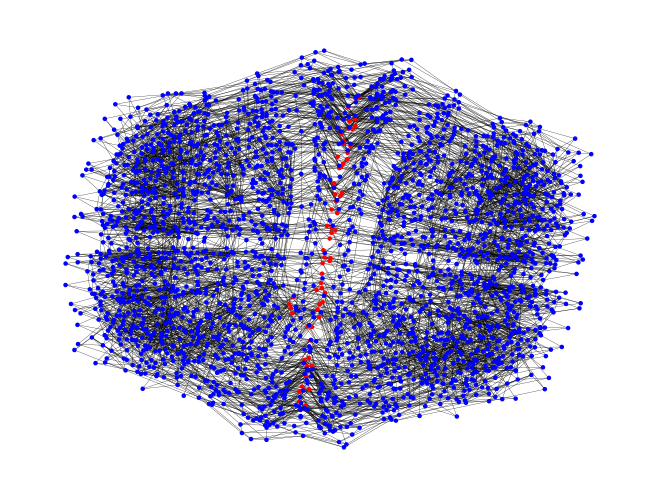

In [99]:
instance4 = json.load(open("teamate3-2.scm.json", "r"))
draw_instance(instance4, skip_largest_degree=False)

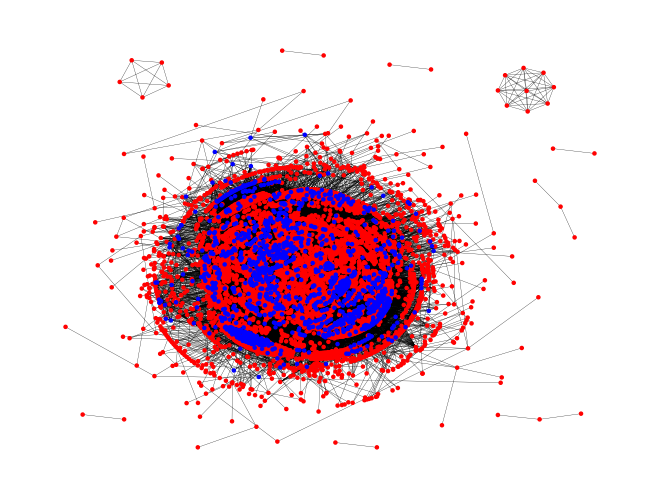

In [92]:
instance5 = json.load(open("linux-2.6.28.6-icse11.scm.json", "r"))
draw_instance(instance5, skip_largest_degree=False)

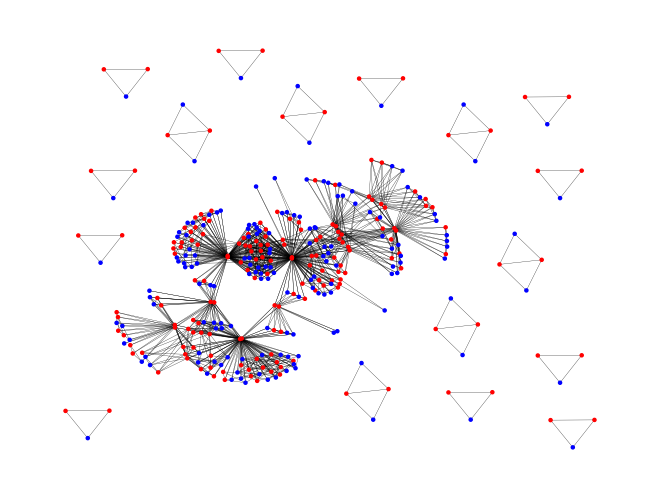

In [94]:
instance6 = json.load(open("axTLS.scm.json", "r"))
draw_instance(instance6, skip_largest_degree=False)

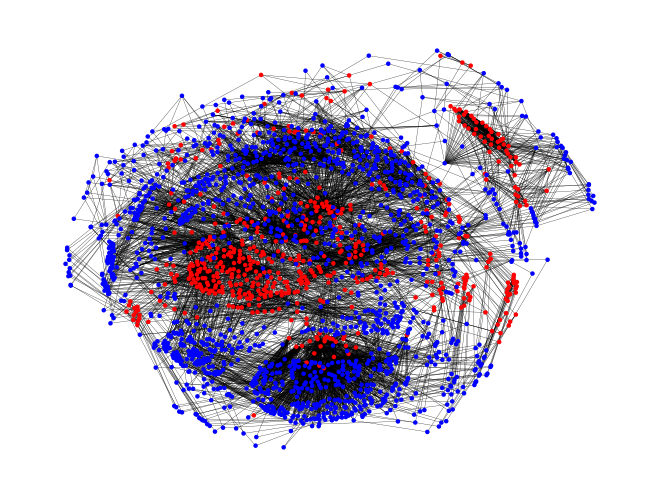

In [95]:
instance7 = json.load(open("FinancialServices-2018-05-09.scm.json", "r"))
draw_instance(instance7)

In [103]:
instance8 = json.load(open("teamate32-2.scm.json", "r"))
draw_instance(instance8, skip_largest_degree=False)

KeyboardInterrupt: 

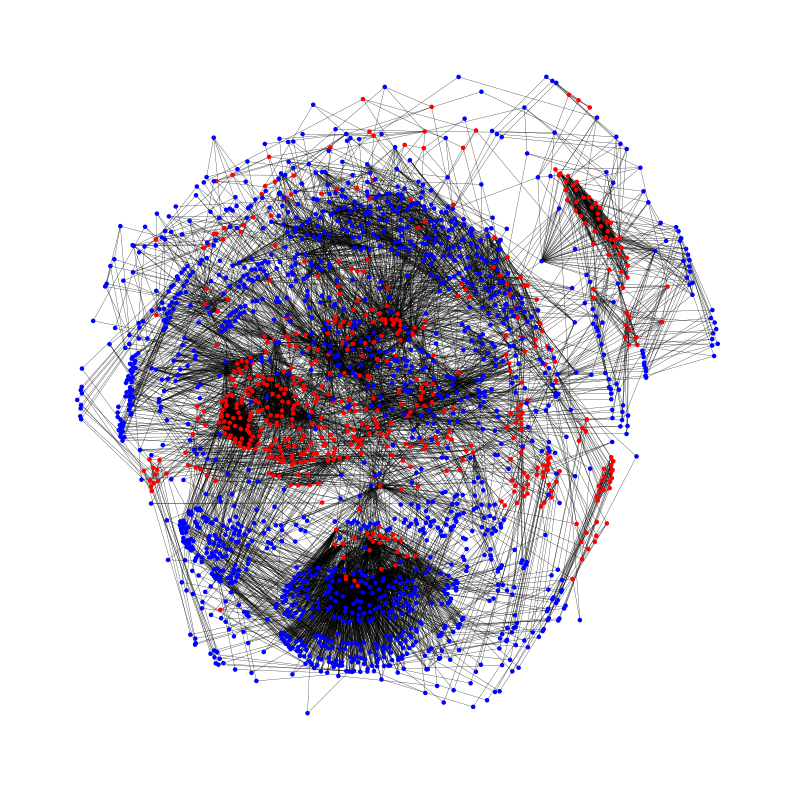

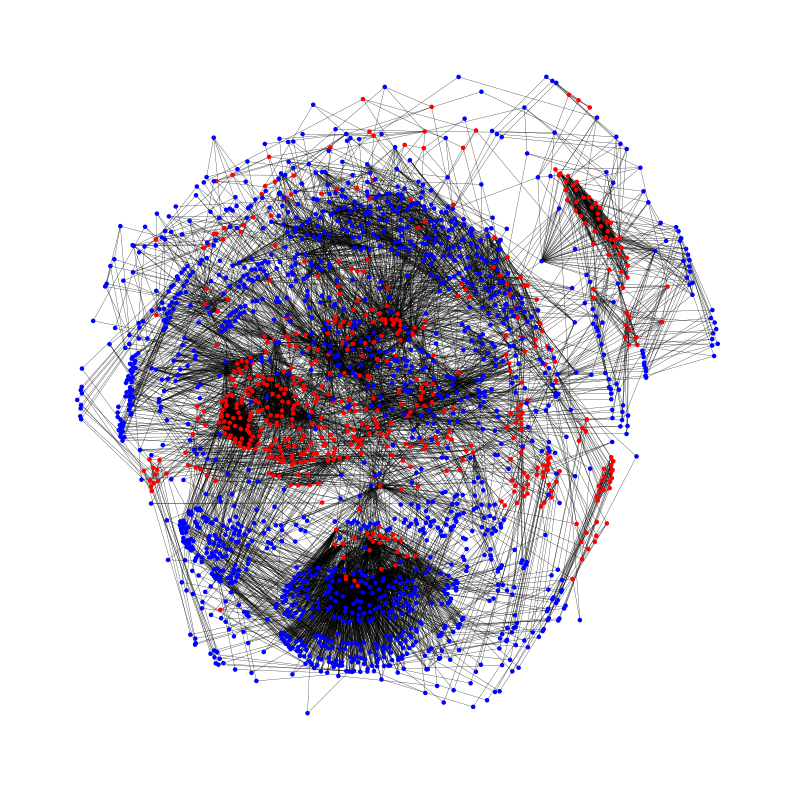